# 1.数据概况与缺失值处理

### 1.1数据集描述：

我们为参赛者提供了大量非常宝贵的、来自微额借款行业第一线的实战数据。不仅有常规的带标签数据，还有无标签的数据供大家挑战semi-supervised learning。数据集中共有1138个特征，以用户的多维度行为数据为主。既有数值型特征，也有类别型特征，且均经过脱敏处理。

数据主要包含以下几类：（编码均为UTF-8）

1) 训练集（带标签）：15,000个样本
     带标签的训练集中共有15,000个样本。train_x.csv中存有样本的特征信息，uid为样本的id，x0、x1、x2...为特征。train_y.csv中存有样本的标签信息，uid为样本的id，y为样本的标签：1为正样本（人品杠杠滴），0为负样本（人品堪忧）；

2) 测试集：5,000个样本
     test_x.csv中存有测试集的特征信息，格式同train_x.csv。参赛者的目标是尽可能准确地区分测试集中样本的标签。

3) 训练集（无标签）：50,000个样本
    在微额借款的真实场景中，除了放款的客户（人品已知），还有相当一部分被拒绝的客户，他们的人品是未知的。为了提高本次比赛的趣味性与挑战性，我们从中挑选了50,000个样本，存在train_unlabeled.csv中，格式同train_x.csv。供参赛者进行semi-supervised learning的探索。

4)特征描述：
features_type.csv为本次比赛的1138个特征的类型资料；feature为特征名：x1, x2, x3...type为特征类型：numeric（数值型）或category（类别型）。

### 1.2Load DATA

In [1]:

import pandas as pd


train_x = pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/train_x.csv")
test_x = pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/test_x.csv")
train_unlabeled =  pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/train_unlabeled.csv")
train_y = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_y.csv')



In [2]:
print(train_x.shape)#15000*1140
print(test_x.shape)#5000*1140
print(train_unlabeled.shape)#50000*1140
print(train_y.shape)

(15000, 1139)
(5000, 1139)
(50000, 1139)
(15000, 2)


In [3]:
#分析标签平衡程度：
train_y.groupby('y').count()

,uid
y,
0,1542
1,13458


由上可见数据集标签是非常不平衡的，接近 10：1的正负标签比

### 1.3 处理缺失值

In [4]:
#count the missing value amounts of each rows
train_x['n_null'] = (train_x<0).sum(axis=1)
test_x['n_null'] = (test_x<0).sum(axis=1)
train_unlabeled['n_null'] = (train_unlabeled<0).sum(axis=1)
print(train_x['n_null'])
print(test_x['n_null'])
print(train_unlabeled['n_null'])


0         44
1        156
2        175
3        165
4         45
5         53
6         45
7        178
8         41
9         59
10        52
11        44
12       157
13        42
14       160
15       181
16       174
17        61
18        41
19       158
20        51
21        48
22       177
23       168
24       175
25        59
26       162
27        51
28        41
29        46
        ... 
14970     53
14971    178
14972    165
14973     64
14974     42
14975    164
14976     27
14977     29
14978     57
14979     52
14980    153
14981     56
14982    183
14983     45
14984     60
14985    164
14986    158
14987    158
14988     62
14989    170
14990     66
14991    163
14992    125
14993     45
14994     57
14995     54
14996     68
14997     49
14998     36
14999    171
Name: n_null, Length: 15000, dtype: int64
0       166
1       174
2        33
3       165
4        58
5       163
6        58
7        53
8        50
9        58
10       41
11      173
12      161
13       

In [8]:
print(train_x['n_null'].sum()/train_x.shape[0])
print(test_x['n_null'].sum()/test_x.shape[0])
print(train_unlabeled['n_null'].sum()/train_unlabeled.shape[0])

88.91466666666666
87.692
114.38698


由上可见平均来看，数据集中每一行缺失值的个数在90-110左右，接近缺失了10%的数据

这让我在想，可以将缺失值的数量作为新特征，将一行的缺失值作为一个新特征加入dataframe并按区间分类别

In [9]:
train_x['discret_null'] = train_x.n_null
train_x[['uid','n_null','discret_null']].to_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_null.csv',index=None)

test_x['discret_null'] = test_x.n_null
test_x[['uid','n_null','discret_null']].to_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_null.csv',index=None)

train_unlabeled['discret_null'] = train_unlabeled.n_null
train_unlabeled[['uid','n_null','discret_null']].to_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_null.csv',index=None)

### 1.4 缺失值数量可视化

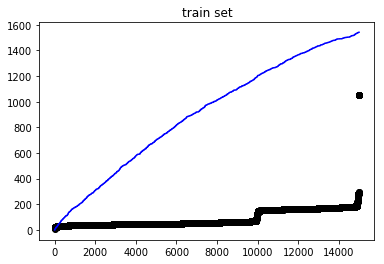

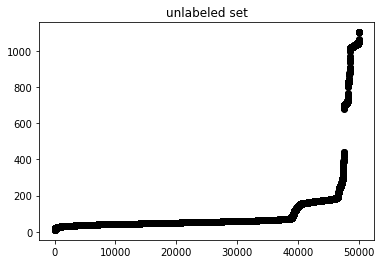

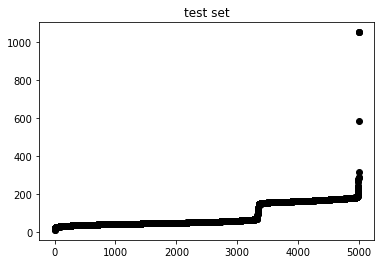

In [13]:
import numpy as np
import matplotlib.pylab as plt

train = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_null.csv')[['uid','n_null']]
train = pd.merge(train,train_y,on='uid')
train = train.sort_values(by='n_null')

train_unlabel = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_null.csv')[['uid','n_null']]
train_unlabel = train_unlabel.sort_values(by='n_null')

test = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_null.csv')[['uid','n_null']]
test = test.sort_values(by='n_null')

t = train.n_null.values
y = train.y.values
y0 = [ i+1-sum(y[0:i+1]) for i in range(len(y))]
x = range(len(t))
plt.scatter(x,t,c='k')
plt.plot(x,y0,c='b')
plt.title('train set')
plt.show()


t = train_unlabel.n_null.values
x = range(len(t))
plt.scatter(x,t,c='k')
plt.title('unlabeled set')
plt.show()


t = test.n_null.values
x = range(len(t))
plt.scatter(x,t,c='k')
plt.title('test set')
plt.show()


由上图可见，在三个数据集中缺失值的数量分布都呈现出阶梯化的规律，猜测有可能是正好对应了不同批次不同渠道的用户群体（如通过APP端注册了很久的，通过网页端拉新活动还没来得及填充全部信息的等等）

可以按照图像上呈现出的缺失值分布规律对它们进行分组

我们进一步放大局部，来看一看，根据局部放大的缺失值分布来确定分组方法：

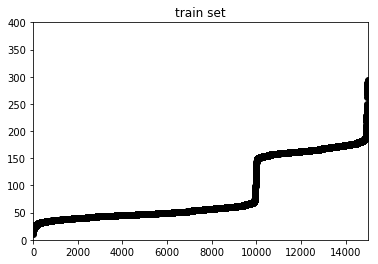

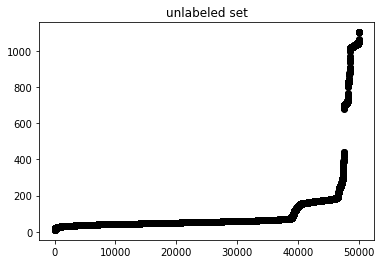

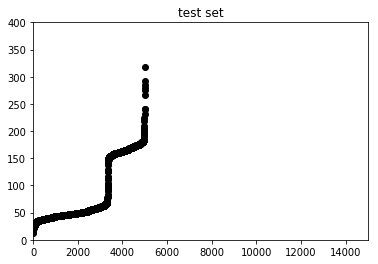

In [14]:

t = train.n_null.values
x = range(len(t))
plt.scatter(x,t,c='k')
plt.title('train set')
v=[0,15000,0,400]
plt.axis(v)
plt.show()


t = train_unlabel.n_null.values
x = range(len(t))
plt.scatter(x,t,c='k')
plt.title('unlabeled set')
plt.show()


t = test.n_null.values
x = range(len(t))
plt.scatter(x,t,c='k')
plt.title('test set')
plt.axis(v)
plt.show()


### 1.5缺失值分组

《32 为组1， 32-69为组2， 69-150为组3，150-194为组4，194以上为组5

In [15]:
train_x.discret_null[train_x.discret_null<=32] = 1
train_x.discret_null[(train_x.discret_null>32)&(train_x.discret_null<=69)] = 2
train_x.discret_null[(train_x.discret_null>69)&(train_x.discret_null<=150)] = 3
train_x.discret_null[(train_x.discret_null>150)&(train_x.discret_null<=194)] = 4
train_x.discret_null[(train_x.discret_null>194)] = 5

test_x.discret_null[test_x.discret_null<=32] = 1
test_x.discret_null[(test_x.discret_null>32)&(test_x.discret_null<=69)] = 2
test_x.discret_null[(test_x.discret_null>69)&(test_x.discret_null<=150)] = 3
test_x.discret_null[(test_x.discret_null>150)&(test_x.discret_null<=194)] = 4
test_x.discret_null[(test_x.discret_null>194)] = 5

train_unlabeled.discret_null[train_unlabeled.discret_null<=32] = 1
train_unlabeled.discret_null[(train_unlabeled.discret_null>32)&(train_unlabeled.discret_null<=69)] = 2
train_unlabeled.discret_null[(train_unlabeled.discret_null>69)&(train_unlabeled.discret_null<=50)] = 3
train_unlabeled.discret_null[(train_unlabeled.discret_null>150)&(train_unlabeled.discret_null<=194)] = 4
train_unlabeled.discret_null[(train_unlabeled.discret_null>194)] = 5

C:\Users\tianjiayang\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\tianjiayang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\tianjiayang\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C

看一下针对缺失值数量分组标注后的分布情况：
大部分集中在2组和4组，5组人数较少

In [16]:
train_x.groupby('discret_null').count()

,uid,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x1130,x1131,x1132,x1133,x1134,x1135,x1136,x1137,x1138,n_null
discret_null,,,,,,,,,,,,,,,,,,,,,
1,458,458,458,458,458,458,458,458,458,458,...,458,458,458,458,458,458,458,458,458,458
2,9408,9408,9408,9408,9408,9408,9408,9408,9408,9408,...,9408,9408,9408,9408,9408,9408,9408,9408,9408,9408
3,243,243,243,243,243,243,243,243,243,243,...,243,243,243,243,243,243,243,243,243,243
4,4791,4791,4791,4791,4791,4791,4791,4791,4791,4791,...,4791,4791,4791,4791,4791,4791,4791,4791,4791,4791
5,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [17]:
test_x.groupby('discret_null').count()

,uid,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x1130,x1131,x1132,x1133,x1134,x1135,x1136,x1137,x1138,n_null
discret_null,,,,,,,,,,,,,,,,,,,,,
1,147,147,147,147,147,147,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
2,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,...,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
3,75,75,75,75,75,75,75,75,75,75,...,75,75,75,75,75,75,75,75,75,75
4,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595,...,1595,1595,1595,1595,1595,1595,1595,1595,1595,1595
5,20,20,20,20,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20


In [22]:
pass

# 2.特征工程：

### 2.1 排序特征：

相对于原本的连续性特征来说，我们将他们排序后得到离散值更为鲁棒一些。

只排序数值特征，（当然类别的你也没法排序啊- -）

rank特征的命名：在原始特征前加'r',如'x1'的rank特征为'rx1'

In [23]:
# load a .csv file to describe the feature type(numeric or catagory) for each columns:
feature_type = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/features_type.csv')
numeric_feature = list(feature_type[feature_type.type=='numeric'].feature)



#三份数据集分别排序，使用的时候需要归一化。

test = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/test_x.csv')[['uid']+numeric_feature]
test_rank = pd.DataFrame(test.uid,columns=['uid'])
for feature in numeric_feature:
    test_rank['r'+feature] = test[feature].rank(method='max')
test_rank.to_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_rank.csv',index=None)


train = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_x.csv')[['uid']+numeric_feature]
train_rank = pd.DataFrame(train.uid,columns=['uid'])
for feature in numeric_feature:
    train_rank['r'+feature] = train[feature].rank(method='max')
train_rank.to_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_rank.csv',index=None)


train_unlabeled = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled.csv')[['uid']+numeric_feature]
train_unlabeled_rank = pd.DataFrame(train_unlabeled.uid,columns=['uid'])
for feature in numeric_feature:
    train_unlabeled_rank['r'+feature] = train_unlabeled[feature].rank(method='max')
train_unlabeled_rank.to_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_rank.csv',index=None)

In [34]:
#check the output:
train_rank.describe()
#在这里如果将float转为int是否会更利于接下来的计算？

,uid,rx1,rx2,rx3,rx4,rx5,rx6,rx7,rx8,rx9,...,rx1097,rx1098,rx1099,rx1100,rx1101,rx1102,rx1103,rx1104,rx1105,rx1106
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,10006.614733,7510.934600,7510.501933,7507.642600,7514.630000,9102.955400,7514.477200,7754.356733,7508.381933,7508.407667,...,10179.993200,10804.659733,9450.785067,9780.434867,9210.297400,8602.695533,8879.494533,9042.739467,8853.746067,9020.535333
std,5763.859995,4329.726922,4329.265962,4328.829186,4319.198809,2691.657802,4325.267824,3988.969103,4329.257474,4329.492212,...,3732.369213,4121.510097,3378.508214,3520.052396,3298.074675,3230.994643,3229.590643,3253.416421,3224.687372,3250.396750
min,3.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000
25%,5010.750000,3768.000000,3778.000000,3753.000000,3765.000000,6817.000000,3781.000000,3810.000000,3756.000000,3758.000000,...,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000,4951.000000
50%,10013.500000,7505.000000,7517.000000,7501.000000,7530.000000,7583.000000,7517.000000,7502.000000,7512.500000,7526.000000,...,12275.000000,13528.000000,10498.000000,11353.000000,9817.000000,7703.000000,8764.000000,9323.000000,8707.000000,9250.000000
75%,15014.500000,11253.000000,11255.000000,11257.000000,11263.000000,11346.000000,11264.000000,11256.000000,11261.000000,11254.000000,...,12275.000000,13528.000000,11916.000000,11353.000000,11927.000000,11270.000000,11313.000000,11695.000000,11367.000000,11629.000000
max,20000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000


### 2.2 排序区间特征：
采用等量区间化，即针对每一个排序特征，如果排名是前10%算作区间1，10-20则区间2 依次类推，得到1045维的排序区间特征。

离散特征的命名：在原始特征前加'd',如'x1'的离散特征为'dx1'

In [26]:
train = pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/train_x_rank.csv")
train_x = train.drop(['uid'],axis=1)
test = pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/test_x_rank.csv")
test_x = test.drop(['uid'],axis=1)
train_unlabeled =  pd.read_csv("C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_rank.csv")
train_unlabeled_x =  train_unlabeled.drop(['uid'],axis=1)


train_x[train_x<1500] = 1
train_x[(train_x>=1500)&(train_x<3000)] = 2
train_x[(train_x>=3000)&(train_x<4500)] = 3
train_x[(train_x>=4500)&(train_x<6000)] = 4
train_x[(train_x>=6000)&(train_x<7500)] = 5
train_x[(train_x>=7500)&(train_x<9000)] = 6
train_x[(train_x>=9000)&(train_x<10500)] = 7
train_x[(train_x>=10500)&(train_x<12000)] = 8
train_x[(train_x>=12000)&(train_x<13500)] = 9
train_x[train_x>=13500] = 10

rename_dict = {s:'d'+s[1:] for s in train_x.columns.tolist()}
train_x = train_x.rename(columns=rename_dict)
train_x['uid'] = train.uid
train_x.to_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_discretization.csv',index=None)

train_unlabeled_x[train_unlabeled_x<5000] = 1
train_unlabeled_x[(train_unlabeled_x>=5000)&(train_unlabeled_x<10000)] = 2
train_unlabeled_x[(train_unlabeled_x>=10000)&(train_unlabeled_x<15000)] = 3
train_unlabeled_x[(train_unlabeled_x>=15000)&(train_unlabeled_x<20000)] = 4
train_unlabeled_x[(train_unlabeled_x>=20000)&(train_unlabeled_x<25000)] = 5
train_unlabeled_x[(train_unlabeled_x>=25000)&(train_unlabeled_x<30000)] = 6
train_unlabeled_x[(train_unlabeled_x>=30000)&(train_unlabeled_x<35000)] = 7
train_unlabeled_x[(train_unlabeled_x>=35000)&(train_unlabeled_x<40000)] = 8
train_unlabeled_x[(train_unlabeled_x>=40000)&(train_unlabeled_x<45000)] = 9
train_unlabeled_x[train_unlabeled_x>=45000] = 10
train_unlabeled_x = train_unlabeled_x.rename(columns=rename_dict)
train_unlabeled_x['uid'] = train_unlabeled.uid
train_unlabeled_x.to_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_discretization.csv',index=None)

test_x[test_x<500] = 1
test_x[(test_x>=500)&(test_x<1000)] = 2
test_x[(test_x>=1000)&(test_x<1500)] = 3
test_x[(test_x>=1500)&(test_x<2000)] = 4
test_x[(test_x>=2000)&(test_x<2500)] = 5
test_x[(test_x>=2500)&(test_x<3000)] = 6
test_x[(test_x>=3000)&(test_x<3500)] = 7
test_x[(test_x>=3500)&(test_x<4000)] = 8
test_x[(test_x>=4000)&(test_x<4500)] = 9
test_x[test_x>=4500] = 10
test_x = test_x.rename(columns=rename_dict)
test_x['uid'] = test.uid
test_x.to_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_discretization.csv',index=None)

In [29]:
#check the data:
train_unlabeled_x.describe()

,dx1,dx2,dx3,dx4,dx5,dx6,dx7,dx8,dx9,dx10,...,dx1098,dx1099,dx1100,dx1101,dx1102,dx1103,dx1104,dx1105,dx1106,uid
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,5.508520,5.507460,5.505820,5.505880,5.722920,5.505800,5.556380,5.504400,5.505600,5.505740,...,8.089880,6.525500,6.567760,6.152660,5.660720,5.908640,5.91162,5.925640,5.902620,45000.500000
std,2.872882,2.872105,2.873105,2.872499,2.618084,2.870862,2.800339,2.871729,2.872298,2.872457,...,2.664722,2.383741,2.451336,2.473936,2.674418,2.585581,2.59298,2.542046,2.569846,14433.901067
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,20001.000000
25%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,9.000000,6.000000,6.000000,5.000000,3.000000,4.000000,4.00000,4.000000,4.000000,32500.750000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,...,9.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,45000.500000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,57500.250000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,70000.000000


### 2.3排序计数特征：
基于刚才的排序区间特征，计算一行中区间1出现的次数，区间2出现的次数...依次类推

特征名记为 n1，n2....

In [30]:
train_x = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_discretization.csv')
test_x = pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_discretization.csv')
train_unlabeled_x =  pd.read_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_discretization.csv')

train_x['n1'] = (train_x==1).sum(axis=1)
train_x['n2'] = (train_x==2).sum(axis=1)
train_x['n3'] = (train_x==3).sum(axis=1)
train_x['n4'] = (train_x==4).sum(axis=1)
train_x['n5'] = (train_x==5).sum(axis=1)
train_x['n6'] = (train_x==6).sum(axis=1)
train_x['n7'] = (train_x==7).sum(axis=1)
train_x['n8'] = (train_x==8).sum(axis=1)
train_x['n9'] = (train_x==9).sum(axis=1)
train_x['n10'] = (train_x==10).sum(axis=1)
train_x[['uid','n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']].to_csv('C:/Users/tianjiayang/loan_predicting/data/train_x_nd.csv',index=None)

test_x['n1'] = (test_x==1).sum(axis=1)
test_x['n2'] = (test_x==2).sum(axis=1)
test_x['n3'] = (test_x==3).sum(axis=1)
test_x['n4'] = (test_x==4).sum(axis=1)
test_x['n5'] = (test_x==5).sum(axis=1)
test_x['n6'] = (test_x==6).sum(axis=1)
test_x['n7'] = (test_x==7).sum(axis=1)
test_x['n8'] = (test_x==8).sum(axis=1)
test_x['n9'] = (test_x==9).sum(axis=1)
test_x['n10'] = (test_x==10).sum(axis=1)
test_x[['uid','n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']].to_csv('C:/Users/tianjiayang/loan_predicting/data/test_x_nd.csv',index=None)

train_unlabeled_x['n1'] = (train_unlabeled_x==1).sum(axis=1)
train_unlabeled_x['n2'] = (train_unlabeled_x==2).sum(axis=1)
train_unlabeled_x['n3'] = (train_unlabeled_x==3).sum(axis=1)
train_unlabeled_x['n4'] = (train_unlabeled_x==4).sum(axis=1)
train_unlabeled_x['n5'] = (train_unlabeled_x==5).sum(axis=1)
train_unlabeled_x['n6'] = (train_unlabeled_x==6).sum(axis=1)
train_unlabeled_x['n7'] = (train_unlabeled_x==7).sum(axis=1)
train_unlabeled_x['n8'] = (train_unlabeled_x==8).sum(axis=1)
train_unlabeled_x['n9'] = (train_unlabeled_x==9).sum(axis=1)
train_unlabeled_x['n10'] = (train_unlabeled_x==10).sum(axis=1)
train_unlabeled_x[['uid','n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']].to_csv('C:/Users/tianjiayang/loan_predicting/data/train_unlabeled_nd.csv',index=None)

In [33]:
train_unlabeled_x[['uid','n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']].head()

,uid,n1,n2,n3,n4,n5,n6,n7,n8,n9,n10
0,20001,17,61,54,49,72,73,99,102,180,338
1,20002,0,10,41,50,92,58,106,113,191,385
2,20003,8,14,33,50,59,99,122,106,179,376
3,20004,7,136,39,63,86,65,96,100,153,301
4,20005,643,126,38,33,32,24,26,24,53,46


### 2.4 交叉特征:

即尝试特征间的组合, 比如特征1+特征2， 特征3*特征4等特征间的组合。

但此部分过于耗时，且数据源进行了脱敏，对于每列特征的具体含义我们不可知，如果要搞只能全特征遍历组合，复杂度过高，所以此处放弃进行这部

# 3. A very simple intuitive model with LR:

 这里是最简单的一个L模型，直接使用默认的参数训练刚才制作的10维度的排序计数特征，在在线AUC测试上达到0.625，已经进前25%了，前后用时不超过10分钟。
 
 说明了特征工程有时候真的比模型和参数要重要一些 lol

In [61]:
from sklearn.metrics import accuracy_score
xtr = train_x[['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']]
xte = test_x[['n1','n2','n3','n4','n5','n6','n7','n8','n9','n10']]
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight='balanced', random_state=None, max_iter=1000, multi_class='ovr', verbose=0, warm_start=False, n_jobs=1)
lr_model.fit(xtr,train_y[['y']])
score = lr_model.decision_function(xte)

C:\Users\tianjiayang\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
test_result = pd.DataFrame(test_x[['uid']],columns=["uid"])
test_result["score"] = score
test_result.to_csv("lr_score",index=None,encoding='utf-8')